import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')
import kagglehub



### Data Preparation

download dataset di kaggle

In [2]:
# download data dari kaggle
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


load data csv

In [3]:
book_df = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3/Books.csv')
ratings_df = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3/Ratings.csv').sample(30000)
user_df = pd.read_csv('/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3/Users.csv')


Merge dataset

In [4]:
# Menggabungkan semua dataset berdasarkan User-ID dan ISBN
merged_df = pd.merge(ratings_df, book_df, on='ISBN', how='inner')
merged_df = pd.merge(merged_df, user_df, on='User-ID', how='inner')

# Menampilkan 5 data teratas dari dataframe yang telah digabungkan
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,177432,0380759500,8,Firefly,Piers Anthony,1992,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380759500.0...,http://images.amazon.com/images/P/0380759500.0...,http://images.amazon.com/images/P/0380759500.0...,"wichita, kansas, usa",33.0
1,153563,0345413075,0,The Perfect Witness,Barry Siegel,1998,Ballantine Books,http://images.amazon.com/images/P/0345413075.0...,http://images.amazon.com/images/P/0345413075.0...,http://images.amazon.com/images/P/0345413075.0...,"muncie, indiana, usa",NaN
2,100906,0140350357,8,Water Babies (Puffin Classics),Charles Kingsley,1984,Puffin Books,http://images.amazon.com/images/P/0140350357.0...,http://images.amazon.com/images/P/0140350357.0...,http://images.amazon.com/images/P/0140350357.0...,"seattle, washington, usa",34.0
3,89387,037570504X,6,"Breath, Eyes, Memory",Edwidge Danticat,1998,Vintage Books USA,http://images.amazon.com/images/P/037570504X.0...,http://images.amazon.com/images/P/037570504X.0...,http://images.amazon.com/images/P/037570504X.0...,"novato, california, usa",NaN
4,269566,0440586550,0,Thurston House,Danielle Steel,1983,Bantam Dell Pub Group,http://images.amazon.com/images/P/0440586550.0...,http://images.amazon.com/images/P/0440586550.0...,http://images.amazon.com/images/P/0440586550.0...,"seattle, washington, usa",9.0


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26933 entries, 0 to 26932
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              26933 non-null  int64  
 1   ISBN                 26933 non-null  object 
 2   Book-Rating          26933 non-null  int64  
 3   Book-Title           26933 non-null  object 
 4   Book-Author          26933 non-null  object 
 5   Year-Of-Publication  26933 non-null  object 
 6   Publisher            26933 non-null  object 
 7   Image-URL-S          26933 non-null  object 
 8   Image-URL-M          26933 non-null  object 
 9   Image-URL-L          26933 non-null  object 
 10  Location             26933 non-null  object 
 11  Age                  19644 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.5+ MB


### Data Cleaning

cek duplikat

In [6]:
merged_df.duplicated().sum()

0

cek missing value

In [7]:
#cek null pada dataframe
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


cek ukuran dataframe

In [8]:
merged_df.shape

(26933, 12)

cek jumlah data keseluruhan

In [9]:
merged_df.size

323196

berdasarkan hasil cek data  memiliki banyak missing value

### EDA

cek unique value

In [10]:
# melihat nilai unik setiap variabel
merged_df.nunique()

,0
User-ID,10327
ISBN,20493
Book-Rating,11
Book-Title,19363
Book-Author,10999
Year-Of-Publication,131
Publisher,2740
Image-URL-S,20492
Image-URL-M,20492
Image-URL-L,20492


drop id karna tidak memiliki korelasi apapun

In [11]:
# menghilangkan data image url S dan M dari merged_df
df=merged_df.drop(['Image-URL-M','Image-URL-S'],axis=1)

### Univariate Analysis


visualisasi Distribusi Rating

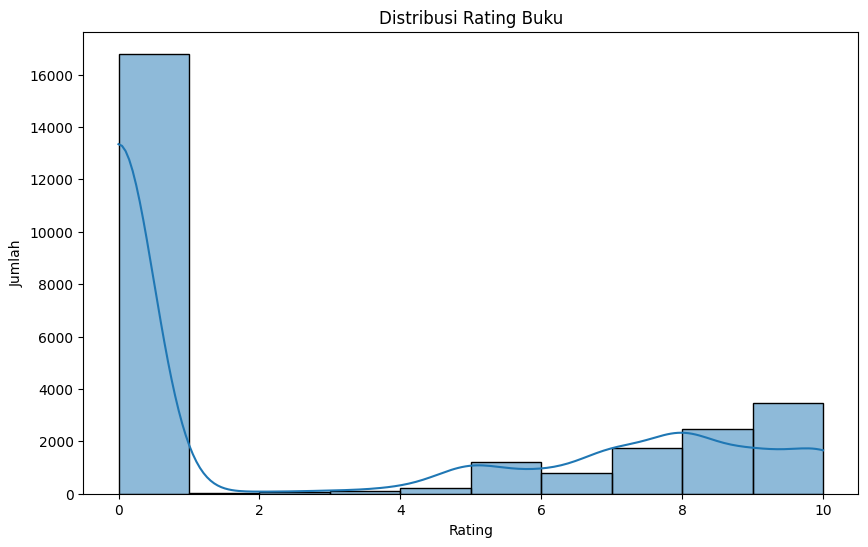

In [12]:
# Distribusi Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Book-Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

berdasarkan gambar diatas bahwa distribusi ratingnya right skewed dengan paling banyak rating 1.

visualisasi Distribusi tahun publikasi

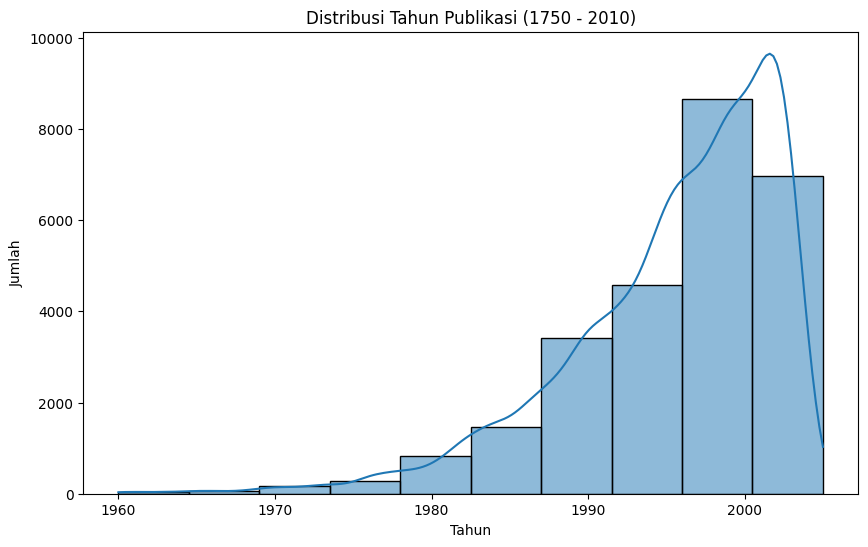

In [13]:
# Mengubah kolom 'Year-Of-Publication' menjadi integer
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)

# Filter data untuk tahun antara 1750 dan 2010
df_filtered = df[(df['Year-Of-Publication'] >= 1960) & (df['Year-Of-Publication'] <= 2008)]

# Distribusi Tahun Publikasi
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Year-Of-Publication'], bins=10, kde=True)
plt.title('Distribusi Tahun Publikasi (1750 - 2010)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

berdasarkan gambar diatas bahwa distribusinya left skewed dengan kebanyakan tahun publikasi pada tahun 1990 sampai tahun 2000.

visualisasi outliers age dan rating

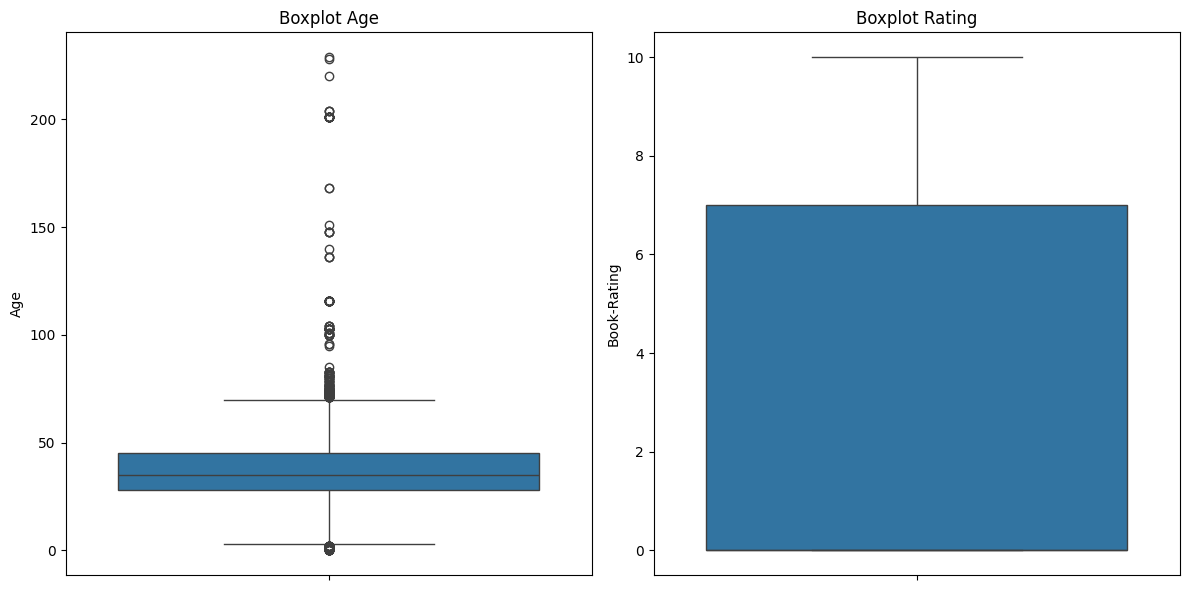

In [14]:
# Membuat visualisasi boxplot untuk Age dan Rating
plt.figure(figsize=(12, 6))

# Boxplot untuk Age
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title('Boxplot Age')

# Boxplot untuk Rating
plt.subplot(1, 2, 2)
sns.boxplot(y='Book-Rating', data=df)
plt.title('Boxplot Rating')

plt.tight_layout()
plt.show()


berdasarkan gambar diatas bahwa terdapat banyak nilai outliers pada age.

### Data Preprocessing

handling missing value

In [15]:
# Mengubah nilai null pada kolom 'Age' menggunakan teknik inputasi
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

handling outliers

In [16]:
# menghilangkan data outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25032 entries, 0 to 26932
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              25032 non-null  int64  
 1   ISBN                 25032 non-null  object 
 2   Book-Rating          25032 non-null  int64  
 3   Book-Title           25032 non-null  object 
 4   Book-Author          25032 non-null  object 
 5   Year-Of-Publication  25032 non-null  int64  
 6   Publisher            25032 non-null  object 
 7   Image-URL-L          25032 non-null  object 
 8   Location             25032 non-null  object 
 9   Age                  25032 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ MB


### Modeling

#### model Collaborative Filtering

In [18]:
%pip install surprise

Metode ini memanfaatkan data dari pengguna lain untuk memberikan rekomendasi. Dalam hal ini, model SVD (Singular Value Decomposition) digunakan untuk memprediksi rating buku berdasarkan pola rating dari pengguna lain.

Inisialisasi data dan skala rating untuk Collaborative Filtering

In [19]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_clean[['User-ID', 'ISBN', 'Book-Rating']], reader)



Membagi data menjadi train dan test set dengan perbandingan 80:20

In [20]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

membuat model SVD

In [21]:
svd_model = SVD()
svd_model.fit(trainset)

 Melakukan prediksi pada test set

In [22]:
predictions = svd_model.test(testset)

Evaluasi Collaborative Filtering menggunakan RMSE dan MSE

In [23]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 3.6319
MAE:  3.1951


Berdasarkan nilai metrik RMSE sebesar 3.6319 dan MAE sebesar 3.1951, dapat disimpulkan bahwa model memiliki akurasi prediksi yang moderat dengan rata-rata kesalahan sekitar 3 satuan dari nilai sebenarnya. 

membuat fungsi rekomendasi

In [24]:
def recommend_books(user_id, n=10):
    # List all unique book titles
    all_books = df_clean['Book-Title'].unique()

    # Remove books already rated by the user
    rated_books = df_clean[df_clean['User-ID'] == user_id]['Book-Title'].values
    books_to_predict = [book for book in all_books if book not in rated_books]

    # Predict ratings for remaining books
    predictions = []
    for book in books_to_predict:
        pred = svd_model.predict(user_id, book)
        predictions.append((book, pred.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_n = predictions[:n]
    print(f"Top 10 rekomendasi buku untuk user {user_id}:")
    # Iterate through 'top_n' instead of 'recommended_books'
    for i, (title, _) in enumerate(top_n, start=1):
        print(f"{i}. {title}")
    return top_n

inference

In [25]:
user_id = 271705
recommended_books = recommend_books(user_id)


Top 10 rekomendasi buku untuk user 271705:
1. Firefly
2. The Perfect Witness
3. Water Babies (Puffin Classics)
4. In the Cut: A Novel
5. Walden Two (Cliffs Notes)
6. Neverwhere
7. Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)
8. NOTES TO MYSELF
9. Lone Star Legacy: A Texas Cookbook
10. Tales of the Dark Knight


#### model content-based filtering

Metode ini memanfaatkan data karakteristik/konten dari buku(judul, penulis, penerbit) untuk memberikan rekomendasi. Dalam hal ini, Menggunakan cosine similarity digunakan untuk untuk menghitung kemiripan antar buku.

Combine kolom yang relevan untuk content-based filtering

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

df_clean['combined_features'] = df_clean['Book-Title'] + ' ' + df_clean['Book-Author'] + ' ' + df_clean['Publisher']


membuat matrix TF-IDF

In [27]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_clean['combined_features'])
tfidf_matrix.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

menghitung matriks cosine similarity

In [28]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)



membuat fungsi rekomendasi

In [29]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Memeriksa apakah judul buku ada dalam DataFrame
    if title not in df_clean['Book-Title'].values:
        print(f"Buku dengan judul '{title}' tidak ditemukan.")
        return

    # Mendapatkan indeks dari buku yang sesuai dengan judul
    idx = df_clean[df_clean['Book-Title'] == title].index[0]

    # Mendapatkan skor kesamaan dari semua buku dengan buku yang diberikan
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan buku berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks buku dari 10 buku yang paling mirip
    book_indices = [i[0] for i in sim_scores[1:11]]

    # Mengembalikan dan mencetak judul buku yang paling mirip
    recommended_books = df_clean['Book-Title'].iloc[book_indices].tolist()
    print(f"Rekomendasi buku untuk judul buku '{title}':")
    for i, book in enumerate(recommended_books, 1):
        print(f"{i}. {book}")


inference

In [30]:
get_recommendations('Moment of Truth')

Rekomendasi buku untuk judul buku 'Moment of Truth':
1. Death in the Andamans
2. V
3. Strong As Death
4. Crazy for You
5. Cat Magic
6. The Dark Side of the Sun
7. Name Dropping
8. Digging Your Own Grave
9. The Berlin Stories: The Last of Mr. Norris and  Goodbye to Berlin (New Directions Book)
10. Reliquary
